# Importing Libraries

In [90]:
# import tensorflow as tf
# import keras as k
# dir(k)

In [91]:
# from keras.preprocessing import image as i
# dir(i)

In [92]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import keras
import tensorflow

# Importing Deep Learning Libraries

from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam,SGD,RMSprop
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

## 🔁 Traditional Neural Network (MLP) for Emotion Classification

# Displaying Images

In [93]:
picture_size = 48
# folder_path = "../input/face-expression-recognition-dataset/images/"
folder_path = "C:/Users/Masum/Desktop/Ai/Human_Emotion_Detection/images/images/"
# C:\Users\Pankaj\Downloads\Compressed\Project\images\images\train

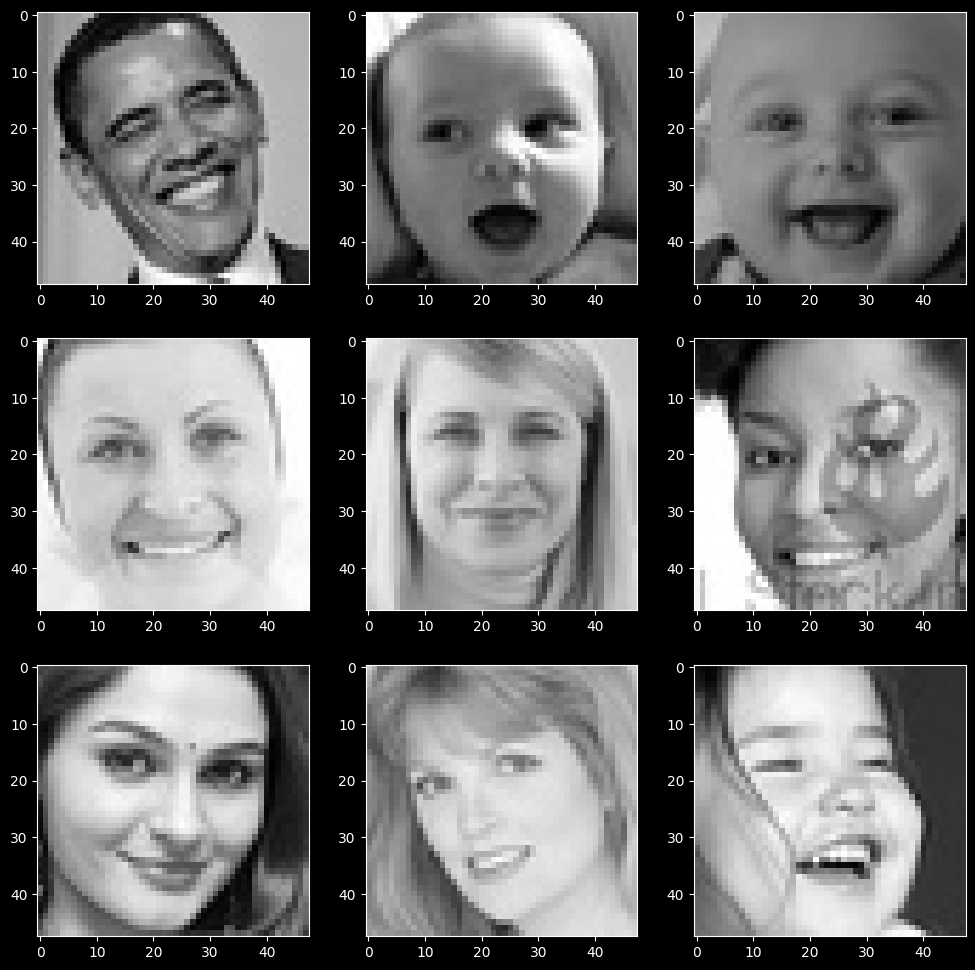

In [94]:
expression = 'happy'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression+"/"+
                  os.listdir(folder_path + "train/" + expression)[i], target_size=(picture_size, picture_size))
    # img = load_img(folder_path+"train/"+expression+"/"+
    #               os.listdir(folder_path + "train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)   
plt.show()

# List all image files


# Making Training and Validation Data

In [95]:
batch_size  = 128
datagen_train  = ImageDataGenerator()
datagen_val = ImageDataGenerator()

train_set = datagen_train.flow_from_directory(folder_path+"train",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True)


test_set = datagen_val.flow_from_directory(folder_path+"validation",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=False)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


# Model Building

## 🔁 Traditional Neural Network (MLP) for Emotion Classification


In [96]:
from tensorflow.keras.optimizers import Adam,SGD,RMSprop


no_of_classes = 7

model = Sequential()

#1st CNN layer
model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#2nd CNN layer
model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#3rd CNN layer
model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes, activation='softmax'))



opt = Adam(learning_rate = 0.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)              │ (None, 48, 48, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_36          │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_36 (Activation)      │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_36 (Dropout)            │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 24, 24, 128)    │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_37          │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_37 (Activation)      │ (None, 24, 24, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_37 (Dropout)            │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 12, 12, 512)    │       590,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_38          │ (None, 12, 12, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_38 (Activation)      │ (None, 12, 12, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_38 (Dropout)            │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_39          │ (None, 6, 6, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_39 (Activation)      │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_27 (MaxPooling2D) │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_39 (Dropout)            │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 256)            │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_40          │ (None, 256)            │         1,02

 Total params: 4,478,727 (17.08 MB)

 Trainable params: 4,474,759 (17.07 MB)

 Non-trainable params: 3,968 (15.50 KB)

# Fitting the Model with Training and Validation Data 

In [97]:
from tensorflow.keras.optimizers import RMSprop,SGD,Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

# epochs = 48
epochs = 1

model.compile(loss='categorical_crossentropy',
              optimizer = Adam(learning_rate=0.001),
              metrics=['accuracy'])

## 🔁 Traditional Neural Network (MLP) for Emotion Classification

In [98]:
# Placeholder for loading or generating X and y
# Replace this with actual code to load your dataset
# For example, you can use numpy arrays or a dataset loader
import numpy as np
X = np.random.rand(1000, 48, 48)  # Example: 1000 grayscale images of size 48x48
y = np.random.randint(0, 7, 1000)  # Example: 1000 labels for 7 classes

# Normalize and flatten the image data for the MLP
X_flattened = X / 255.0  # normalize pixel values to [0, 1]
X_flattened = X_flattened.reshape((X_flattened.shape[0], -1))  # flatten from 48x48 to 2304

# One-hot encode the labels
from tensorflow.keras.utils import to_categorical
y_categorical = to_categorical(y, num_classes=7)

# Split the dataset
from sklearn.model_selection import train_test_split
X_train_mlp, X_val_mlp, y_train_mlp, y_val_mlp = train_test_split(X_flattened, y_categorical, test_size=0.2, random_state=42)


In [99]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Normalize and flatten the image data for the MLP
X_flattened = X / 255.0  # normalize pixel values to [0, 1]
X_flattened = X_flattened.reshape((X_flattened.shape[0], -1))  # flatten from 48x48 to 2304

# One-hot encode the labels
from tensorflow.keras.utils import to_categorical
y_categorical = to_categorical(y, num_classes=7)

# Split the dataset
from sklearn.model_selection import train_test_split
X_train_mlp, X_val_mlp, y_train_mlp, y_val_mlp = train_test_split(X_flattened, y_categorical, test_size=0.2, random_state=42)

# Build traditional MLP model
mlp_model = Sequential()
mlp_model.add(Dense(512, input_shape=(X_train_mlp.shape[1],), activation='relu'))
mlp_model.add(Dropout(0.3))
mlp_model.add(Dense(256, activation='relu'))
mlp_model.add(Dropout(0.3))
mlp_model.add(Dense(7, activation='softmax'))  # 7 emotion classes

# Compile the model
mlp_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
mlp_history = mlp_model.fit(X_train_mlp, y_train_mlp, epochs=20, batch_size=64, validation_data=(X_val_mlp, y_val_mlp))


Epoch 1/20


C:\Users\Masum\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.1532 - loss: 1.9457 - val_accuracy: 0.1200 - val_loss: 1.9532
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.1323 - loss: 1.9420 - val_accuracy: 0.1400 - val_loss: 1.9604
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.1651 - loss: 1.9440 - val_accuracy: 0.1400 - val_loss: 1.9638
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.1850 - loss: 1.9395 - val_accuracy: 0.1200 - val_loss: 1.9614
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.1805 - loss: 1.9416 - val_accuracy: 0.1400 - val_loss: 1.9617
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.1633 - loss: 1.9419 - val_accuracy: 0.1400 - val_loss: 1.9611
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.1409 - loss: 1.9401 - val_accuracy: 0.1400 - val_loss: 1.9640
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.1898 - loss: 1.9371 - val_accuracy: 0.1400 - val_loss: 1.

In [100]:
# history = model.fit_generator(generator=train_set,
#                                 steps_per_epoch=train_set.n//train_set.batch_size,
#                                 epochs=epochs,
#                                 validation_data = test_set,
#                                 validation_steps = test_set.n//test_set.batch_size,
#                                 callbacks=callbacks_list
#                                 )


# history = model.fit(
#     x=train_set,
#     steps_per_epoch=train_set.n // train_set.batch_size,
#     epochs=epochs,
#     validation_data=test_set,
#     validation_steps=test_set.n // test_set.batch_size,
#     callbacks=callbacks_list
# )

history = model.fit(
    x=train_set,
    steps_per_epoch=50,
    epochs=epochs,
    validation_data=test_set,
    validation_steps=test_set.n // test_set.batch_size,
    callbacks=callbacks_list
)




C:\Users\Masum\AppData\Roaming\Python\Python310\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


50/50 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.2060 - loss: 2.1362 - val_accuracy: 0.1682 - val_loss: 7.6088 - learning_rate: 0.0010
Restoring model weights from the end of the best epoch: 1.


C:\Users\Masum\AppData\Roaming\Python\Python310\site-packages\keras\src\callbacks\model_checkpoint.py:209: UserWarning: Can save best model only with val_acc available, skipping.
  self._save_model(epoch=epoch, batch=None, logs=logs)


# Plotting Accuracy & Loss

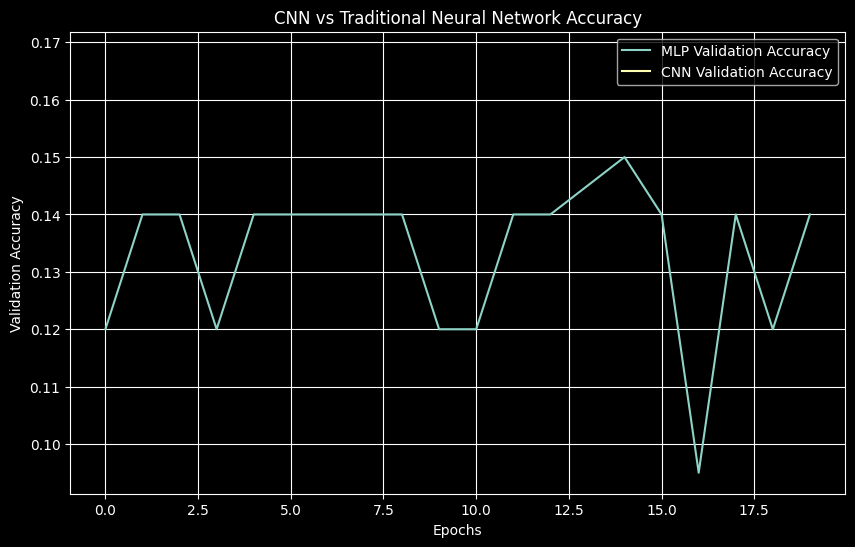

In [104]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(mlp_history.history['val_accuracy'], label='MLP Validation Accuracy')
plt.plot(history.history['val_accuracy'], label='CNN Validation Accuracy')

plt.title('CNN vs Traditional Neural Network Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss', 'learning_rate'])


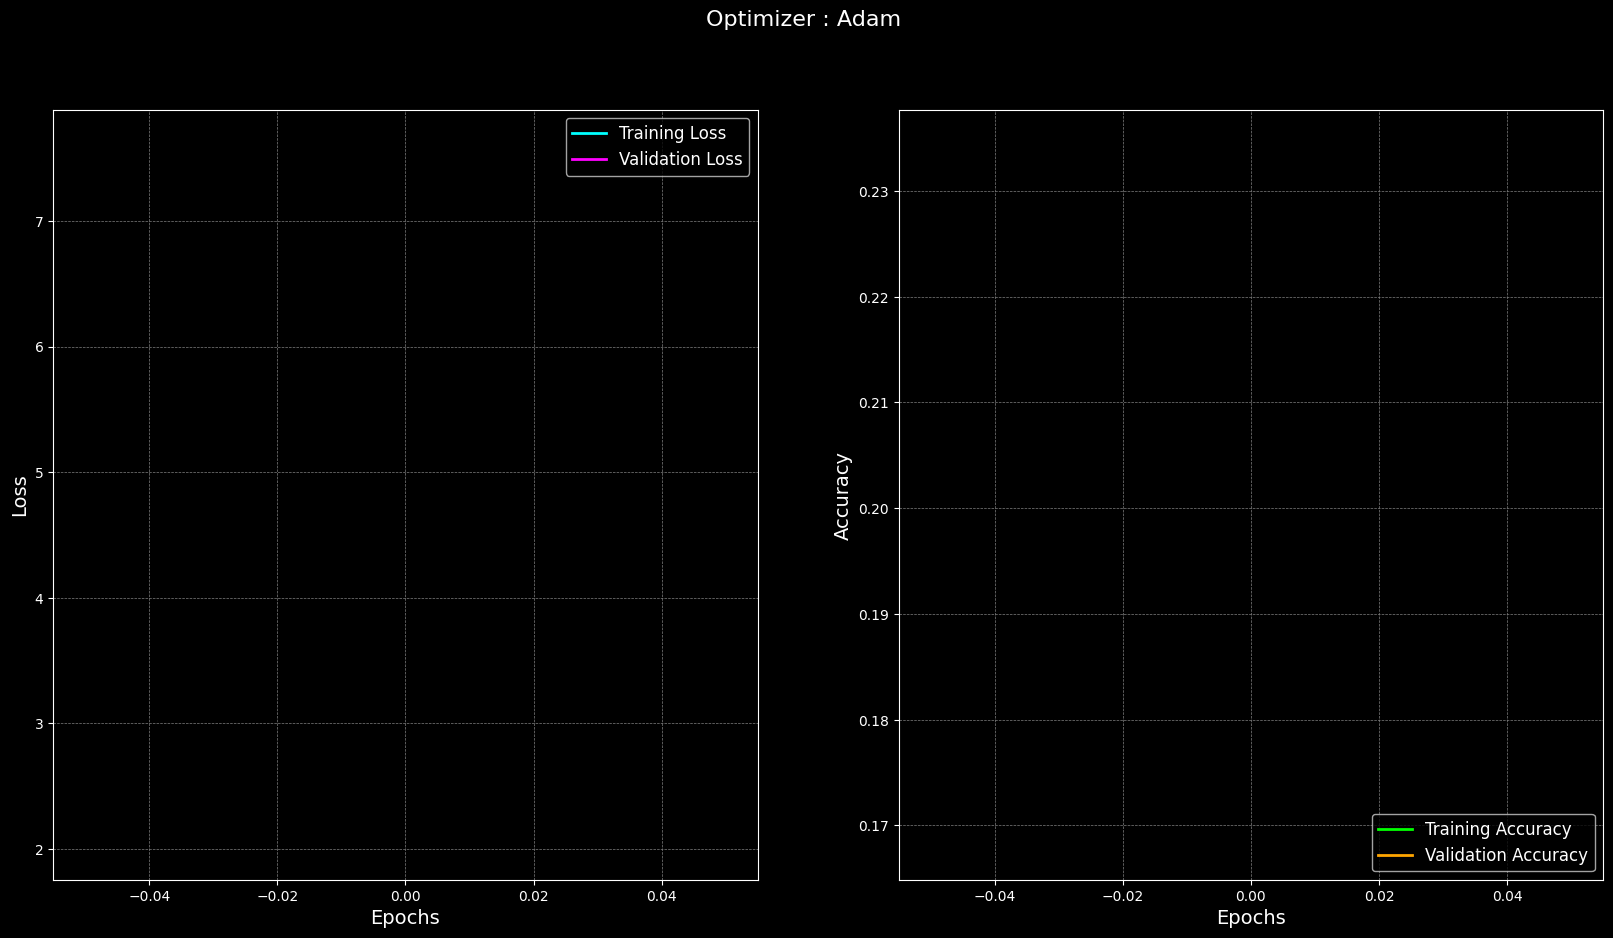

In [109]:
# Ensure matplotlib is imported
import matplotlib.pyplot as plt

# Check if history object contains the required keys
if 'loss' in history.history and 'val_loss' in history.history and 'accuracy' in history.history and 'val_accuracy' in history.history:
    print(history.history.keys())

    # Plotting
    plt.style.use('dark_background')

    plt.figure(figsize=(20, 10))

    # Loss Plot
    plt.subplot(1, 2, 1)
    plt.suptitle('Optimizer : Adam', fontsize=16, color='white')
    plt.ylabel('Loss', fontsize=14, color='white')
    plt.xlabel('Epochs', fontsize=14, color='white')
    plt.plot(history.history['loss'], label='Training Loss', color='cyan', linewidth=2)
    plt.plot(history.history['val_loss'], label='Validation Loss', color='magenta', linewidth=2)
    plt.legend(loc='upper right', fontsize=12)
    plt.grid(color='gray', linestyle='--', linewidth=0.5)

    # Accuracy Plot
    plt.subplot(1, 2, 2)
    plt.ylabel('Accuracy', fontsize=14, color='white')
    plt.xlabel('Epochs', fontsize=14, color='white')
    plt.plot(history.history['accuracy'], label='Training Accuracy', color='lime', linewidth=2)
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange', linewidth=2)
    plt.legend(loc='lower right', fontsize=12)
    plt.grid(color='gray', linestyle='--', linewidth=0.5)

    plt.show()
else:
    print("Error: The history object does not contain the required keys.")

Normalize the data


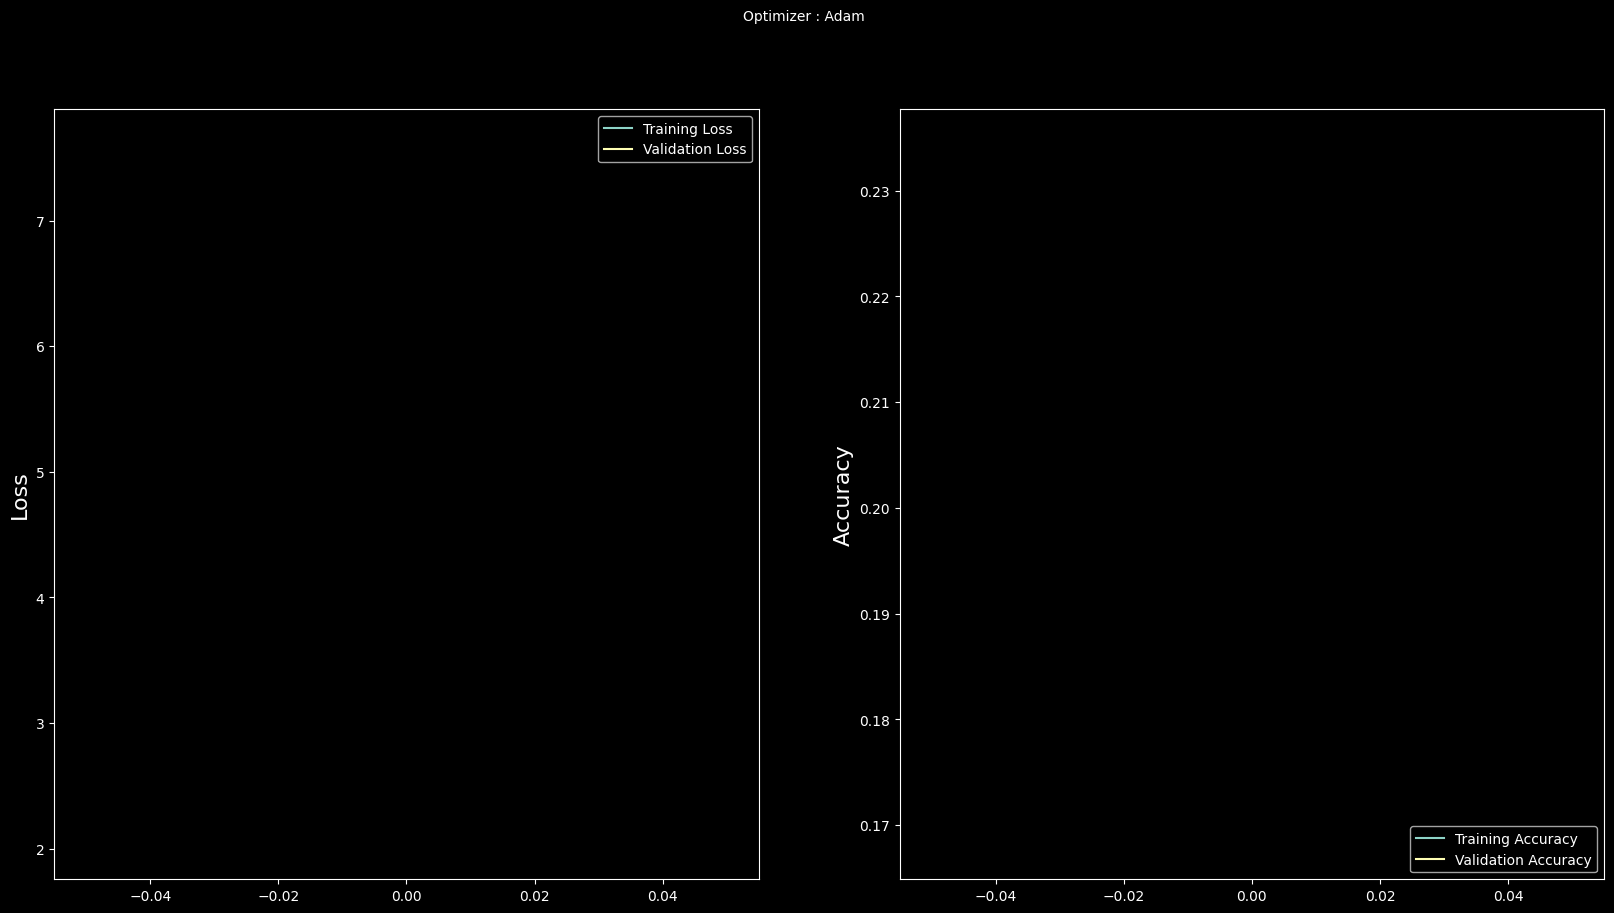

In [102]:
plt.style.use('dark_background')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()